## Import libraries and modules

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Data collection via websrapping

In [4]:
# # Create webscrapper
# api_key = 'f422b58e'

# def fetch_movie_data(movie_titles, api_key):
#     movie_data = []
    
#     for title in movie_titles:
#         search_url = f'http://www.omdbapi.com/?t={title}&apikey={api_key}'
#         response = requests.get(search_url)
        
#         # Check for a successful response
#         if response.status_code == 200:
#             try:
#                 movie_info = response.json()
#                 if movie_info['Response'] == 'True':
#                     awards_text = movie_info.get('Awards', 'N/A')
#                     wins, nominations = "0", "0"
#                     if "wins" in awards_text and "nominations" in awards_text:
#                         wins = awards_text.split("wins")[0].strip()
#                         nominations = awards_text.split("&")[-1].split("nominations")[0].strip()

#                     movie_data.append({
#                         "Title": movie_info.get('Title', 'N/A'),
#                         "Year": movie_info.get('Year', 'N/A'),
#                         "Duration": movie_info.get('Runtime', 'N/A'),
#                         "IMDB Rating": movie_info.get('imdbRating', 'N/A'),
#                         "Genre": movie_info.get('Genre', 'N/A'),
#                         "Actors": movie_info.get('Actors', 'N/A'),
#                         "Nominations": nominations,
#                         "Wins": wins,
#                         "Popularity": movie_info.get('imdbVotes', 'N/A')
#                     })
#                 else:
#                     print(f"Could not find results for {title}")
#             except ValueError:
#                 print(f"Error decoding JSON for {title}: {response.text}")
#         else:
#             print(f"Failed to fetch data for {title}: {response.status_code}")
    
#     return pd.DataFrame(movie_data)

In [5]:
movie_titles = [
    "Inception", "The Dark Knight", "Interstellar", "The Matrix", "Pulp Fiction",
    "The Lord of the Rings: The Fellowship of the Ring", "The Godfather", "The Shawshank Redemption",
    "Fight Club", "Forrest Gump", "The Empire Strikes Back", "The Dark Knight Rises", "Gladiator",
    "The Silence of the Lambs", "Saving Private Ryan", "Braveheart", "Schindler's List", "The Lion King",
    "Jurassic Park", "The Avengers", "Titanic", "The Departed", "The Wolf of Wall Street", "Django Unchained",
    "The Terminator", "Alien", "Blade Runner", "Goodfellas", "The Usual Suspects", "The Big Lebowski",
    "The Sixth Sense", "Se7en", "Avatar", "Avengers: Endgame", "Back to the Future", "Indiana Jones and the Last Crusade",
    "Harry Potter and the Philosopher's Stone", "Pirates of the Caribbean: The Curse of the Black Pearl",
    "Toy Story", "Finding Nemo", "The Incredibles", "Inside Out", "The Exorcist", "Jaws", "Rocky",
    "A Clockwork Orange", "The Shining", "E.T. the Extra-Terrestrial", "The Breakfast Club", "Ferris Bueller's Day Off",
    "The Truman Show", "The Princess Bride", "Monty Python and the Holy Grail", "Groundhog Day", "The Grand Budapest Hotel",
    "La La Land", "Get Out", "Mad Max: Fury Road", "The Godfather: Part II", "Apocalypse Now", "Blade Runner 2049",
    "Casino Royale", "Doctor Strange", "Guardians of the Galaxy", "Logan", "The Revenant", "Spider-Man: Homecoming",
    "The Hateful Eight", "Once Upon a Time in Hollywood", "Parasite", "The Irishman", "1917",
    "Jojo Rabbit", "Joker", "Frozen", "The Shape of Water", "Three Billboards Outside Ebbing, Missouri",
    "Lady Bird", "The King's Speech", "The Social Network", "The Pursuit of Happyness", "A Beautiful Mind",
    "Shutter Island", "Inglourious Basterds", "Catch Me If You Can", "The Curious Case of Benjamin Button",
    "Black Swan", "Slumdog Millionaire", "The Green Mile", "The Notebook", "A Star Is Born",
    "The Help", "Gravity", "The Martian", "Gone Girl", "Whiplash", "The Revenant",
    "Shawshank Redemption", "Schindler's List", "Raging Bull", "Casablanca", "Citizen Kane",
    "Gone with the Wind", "Lawrence of Arabia", "The Godfather: Part II", "One Flew Over the Cuckoo's Nest", "Star Wars",
    "12 Angry Men", "Psycho", "Rear Window", "The Good, the Bad and the Ugly", "Sunset Boulevard",
    "Silence of the Lambs", "Raiders of the Lost Ark", "It's a Wonderful Life", "American Beauty", "Jaws", "The Exorcist",
    "The Silence of the Lambs", "Saving Private Ryan", "Braveheart", "The Lion King", "Titanic",
    "The Departed", "Gladiator", "Rocky", "E.T. the Extra-Terrestrial", "The Breakfast Club",
    "The Truman Show", "Fight Club", "Harry Potter and the Chamber of Secrets", "The Hunger Games", "The Last Samurai",
    "Pirates of the Caribbean: Dead Man's Chest", "The Prestige", "The Pursuit of Happyness", "Star Trek", "The Hobbit: An Unexpected Journey"
]

In [6]:
# # Fetch movie data
# df_movies = fetch_movie_data(movie_titles, api_key)

# # Display movie data
# print(df_movies.head(5))
# print(df_movies.tail(5))

## Data clean-up and preparation

### Movies

In [9]:
# Load data into a pandas DataFrame
df_movies = pd.read_csv('https://raw.githubusercontent.com/Smobin916/-Fuzzy-Pandas-/refs/heads/main/movies_data.csv')

In [10]:
# Replace 'N/A' with NaN
df_movies['IMDB Rating'] = df_movies['IMDB Rating'].replace('N/A', pd.NA)

# Convert 'IMDB Rating' to float, coercing errors to NaN
df_movies['IMDB Rating'] = pd.to_numeric(df_movies['IMDB Rating'], errors='coerce')

# Drop rows with NaN values in 'IMDB Rating'
df_movies = df_movies.dropna(subset=['IMDB Rating'])

# Drop outliers / odd records
# display(df_movies[df_movies['Title'].str.contains('Lambs')])
df_movies = df_movies.drop(112)

# Drop duplicates
df_movies = df_movies.drop_duplicates()

# Sort by 'IMDB Rating' and keep the top 100 films
df_movies = df_movies.nlargest(100, 'IMDB Rating').reset_index(drop=True)

# Display the final DataFrame with top 100 movies
display(df_movies)

,Title,Year,Duration,IMDB Rating,Genre,Actors,Nominations,Wins,Popularity
0,The Shawshank Redemption,1994,142 min,9.3,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",42,Nominated for 7 Oscars. 21,"2,995,055"
1,The Godfather,1972,175 min,9.2,"Crime, Drama","Marlon Brando, Al Pacino, James Caan",31,Won 3 Oscars. 31,"2,090,520"
2,The Dark Knight,2008,152 min,9.0,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart",165,Won 2 Oscars. 164,"2,974,670"
3,Schindler's List,1993,195 min,9.0,"Biography, Drama, History","Liam Neeson, Ralph Fiennes, Ben Kingsley",49,Won 7 Oscars. 91,"1,501,081"
4,The Godfather Part II,1974,202 min,9.0,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall",21,Won 6 Oscars. 17,"1,405,378"
...,...,...,...,...,...,...,...,...,...
95,Star Trek,2009,127 min,7.9,"Action, Adventure, Sci-Fi","Chris Pine, Zachary Quinto, Simon Pegg",95,Won 1 Oscar. 27,"626,359"
96,The Breakfast Club,1985,97 min,7.8,"Comedy, Drama","Emilio Estevez, Judd Nelson, Molly Ringwald",0,0,"449,461"
97,Ferris Bueller's Day Off,1986,103 min,7.8,Comedy,"Matthew Broderick, Alan Ruck, Mia Sara",0,0,"395,990"
98,Get Out,2017,104 min,7.8,"Horror, Mystery, Thriller","Daniel Kaluuya, Allison Williams, Bradley Whit...",214,Won 1 Oscar. 154,"740,263"


### Actors

In [41]:
# Create the initial DataFrame for actors
df_actors = pd.DataFrame(df_movies)

# Split the 'Actors' column into lists
df_actors['Actors'] = df_actors['Actors'].str.split(', ')

# Explode the DataFrame to separate the actors into individual rows
df_actors = df_actors.explode('Actors')[['Actors']].reset_index(drop=True)

# Display the new DataFrame with individual actors
display(df_actors)

,Actors
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton
3,Marlon Brando
4,Al Pacino
...,...
295,Allison Williams
296,Bradley Whitford
297,Samuel L. Jackson
298,Kurt Russell


In [43]:
# Alphabetize the DataFrame by 'Actors'
df_actors = df_actors.sort_values(by='Actors').reset_index(drop=True)

# Count duplicates for each actor
actor_counts = df_actors['Actors'].value_counts().reset_index()
actor_counts.columns = ['Actors', 'Count']

# Merge the counts back into the exploded DataFrame
df_actors = df_actors.merge(actor_counts, on='Actors')

# Drop duplicates
df_actors = df_actors.drop_duplicates().reset_index(drop=True)

# Display the final DataFrame
display(df_actors)

,Actors,Count
0,Aaron Eckhart,1
1,Al Pacino,2
2,Alan Ruck,1
3,Albert Brooks,1
4,Alec Guinness,1
...,...,...
235,William Holden,1
236,Woody Harrelson,1
237,Zachary Quinto,1
238,Zazie Beetz,1


In [45]:
# Sort by count in descending order and keep top 100 actors
top_actors = actor_counts.nlargest(100, 'Count').reset_index(drop=True)

# Display the final DataFrame with top 100 actors
display(top_actors)

,Actors,Count
0,Leonardo DiCaprio,8
1,Harrison Ford,6
2,Tom Hanks,5
3,Robert De Niro,4
4,Jack Nicholson,3
...,...,...
95,Will Smith,1
96,William Holden,1
97,Woody Harrelson,1
98,Zachary Quinto,1


## Exploratory data analysis

### Column engineering

In [17]:
# Create new columns for each genre, actor, and # of wins
df_movies[['Genre 1', 'Genre 2', 'Genre 3']] = df_movies['Genre'].str.split(',', expand=True)
df_movies[['Actor 1', 'Actor 2', 'Actor 3']] = df_movies['Actors'].str.split(',', expand=True)
df_movies[['Oscar wins', 'Total wins']] = df_movies['Wins'].str.split('.', expand=True)

# For 'Total wins', fill 'None' values with 0
df_movies['Total wins'] = pd.to_numeric(df_movies['Total wins'], errors='coerce')
df_movies.fillna({'Total wins': 0}, inplace=True)

# Convert 'Total wins' to integer
df_movies['Total wins'] = df_movies['Total wins'].astype(int)

# Display DataFrame
display(df_movies.head())

,Title,Year,Duration,IMDB Rating,Genre,Actors,Nominations,Wins,Popularity,Genre 1,Genre 2,Genre 3,Actor 1,Actor 2,Actor 3,Oscar wins,Total wins
0,The Shawshank Redemption,1994,142 min,9.3,Drama,"Tim Robbins, Morgan Freeman, Bob Gunton",42,Nominated for 7 Oscars. 21,"2,995,055",Drama,None,None,Tim Robbins,Morgan Freeman,Bob Gunton,Nominated for 7 Oscars,21
1,The Godfather,1972,175 min,9.2,"Crime, Drama","Marlon Brando, Al Pacino, James Caan",31,Won 3 Oscars. 31,"2,090,520",Crime,Drama,None,Marlon Brando,Al Pacino,James Caan,Won 3 Oscars,31
2,The Dark Knight,2008,152 min,9.0,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart",165,Won 2 Oscars. 164,"2,974,670",Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Won 2 Oscars,164
3,Schindler's List,1993,195 min,9.0,"Biography, Drama, History","Liam Neeson, Ralph Fiennes, Ben Kingsley",49,Won 7 Oscars. 91,"1,501,081",Biography,Drama,History,Liam Neeson,Ralph Fiennes,Ben Kingsley,Won 7 Oscars,91
4,The Godfather Part II,1974,202 min,9.0,"Crime, Drama","Al Pacino, Robert De Niro, Robert Duvall",21,Won 6 Oscars. 17,"1,405,378",Crime,Drama,None,Al Pacino,Robert De Niro,Robert Duvall,Won 6 Oscars,17


### What genres of films share the highest % present in the selected top movies?

In [19]:
# Get counts of each genre column
genre1_group = df_movies.groupby('Genre 1')['Title'].count().reset_index()
genre1_group.columns = ['Genre', 'Count']
genre2_group = df_movies.groupby('Genre 2')['Title'].count().reset_index()
genre2_group.columns = ['Genre', 'Count']
genre3_group = df_movies.groupby('Genre 3')['Title'].count().reset_index()
genre3_group.columns = ['Genre', 'Count']

# Concatenate the genre groups
combined_genre_group = pd.concat([genre1_group, genre2_group, genre3_group])

# Remove whitespace in 'Genre' column
combined_genre_group['Genre'] = combined_genre_group['Genre'].str.strip()

# Group by genre and sum the counts
combined_genre_group = combined_genre_group.groupby('Genre')['Count'].sum().reset_index()

# Sort by count in descending order
combined_genre_group = combined_genre_group.sort_values(by='Count', ascending=False).reset_index()

# Drop 'index' column
combined_genre_group = combined_genre_group.drop(columns='index')

# Create percentage column
combined_genre_group['Percentage'] = round((combined_genre_group['Count'] / combined_genre_group['Count'].sum()) * 100, 2)

# Display result
display(combined_genre_group)

,Genre,Count,Percentage
0,Drama,68,25.95
1,Adventure,33,12.60
2,Action,25,9.54
3,Crime,20,7.63
4,Comedy,18,6.87
5,Sci-Fi,16,6.11
6,Mystery,14,5.34
7,Thriller,13,4.96
8,Biography,10,3.82
9,Fantasy,9,3.44


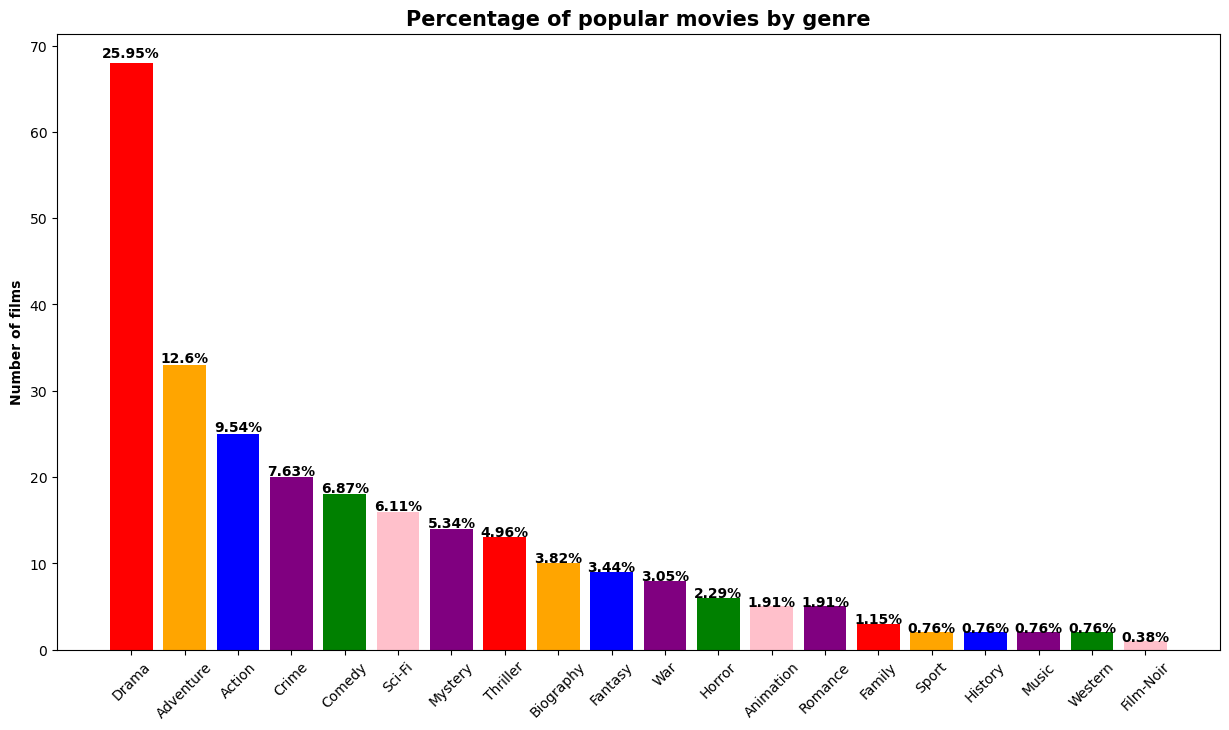

In [20]:
# Create bar chart
plt.figure(figsize=(15,8))
colors_list = ['Red','Orange', 'Blue', 'Purple', 'Green', 'Pink', 'Purple']
graph = plt.bar(combined_genre_group.Genre, combined_genre_group.Count, color = colors_list)
plt.title('Percentage of popular movies by genre', fontweight='bold', fontsize=15)

# Add percentages to each bar
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(combined_genre_group.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

# Update chart labels
plt.xticks(rotation=45)
plt.ylabel('Number of films', fontweight='bold')
plt.ylabel('Number of films', fontweight='bold')

# Display chart
plt.show()

### What genres of films have the highest IMDB ratings?

In [22]:
# Get sums of 'IMDB rating' for each genre column
genre1_IMDB = df_movies.groupby('Genre 1')['IMDB Rating'].sum().reset_index()
genre1_IMDB.columns = ['Genre', 'Ratings sum']
genre2_IMDB = df_movies.groupby('Genre 2')['IMDB Rating'].sum().reset_index()
genre2_IMDB.columns = ['Genre', 'Ratings sum']
genre3_IMDB = df_movies.groupby('Genre 3')['IMDB Rating'].sum().reset_index()
genre3_IMDB.columns = ['Genre', 'Ratings sum']

# Concatenate the IMDB groups
IMDB_group = pd.concat([genre1_IMDB, genre2_IMDB, genre3_IMDB])

# Remove whitespace in 'Genre' column
IMDB_group['Genre'] = IMDB_group['Genre'].str.strip()

# Group by genre and sum the counts
IMDB_group = IMDB_group.groupby('Genre')['Ratings sum'].sum().reset_index()

# Sort by count in descending order
IMDB_group = IMDB_group.sort_values(by='Ratings sum', ascending=False).reset_index()

# Drop 'index' column
IMDB_group = IMDB_group.drop(columns='index')

# Merge genre and IMDB DataFrames
genre_IMDB = pd.merge(IMDB_group, combined_genre_group, on='Genre', how='inner')

# Create IMDB rating average column
genre_IMDB['IMDB_rating_avg'] = round(genre_IMDB['Ratings sum'] / genre_IMDB['Count'], 2)

# Sort by IMDB average
genre_IMDB = genre_IMDB.sort_values('IMDB_rating_avg', ascending=True).reset_index()
genre_IMDB = genre_IMDB.drop(columns='index')

# Display result
display(genre_IMDB)

,Genre,Ratings sum,Count,Percentage,IMDB_rating_avg
0,Sport,16.2,2,0.76,8.10
1,Comedy,146.0,18,6.87,8.11
2,Family,24.5,3,1.15,8.17
3,Animation,41.1,5,1.91,8.22
4,Horror,49.4,6,2.29,8.23
5,Music,16.5,2,0.76,8.25
6,Action,206.4,25,9.54,8.26
7,Mystery,115.6,14,5.34,8.26
8,Adventure,272.9,33,12.60,8.27
9,Sci-Fi,132.3,16,6.11,8.27


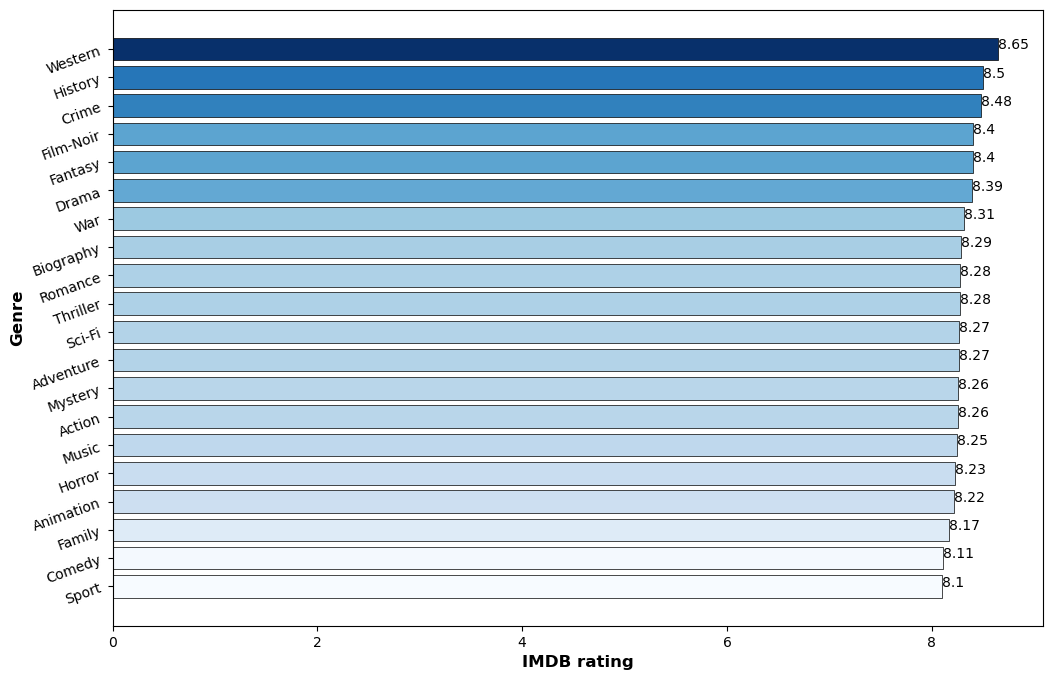

In [61]:
# Create gradient colors for bar chart
def gradient_color_list(heights, cmap_name='Blues'):
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(min(heights), max(heights))
    color_list = [cmap(norm(height)) for height in heights]
    return color_list
colors = gradient_color_list(genre_IMDB['IMDB_rating_avg'])

# Create bar chart
plt.figure(figsize=(12, 8))
plot = plt.barh(genre_IMDB.Genre, genre_IMDB.IMDB_rating_avg, color=colors, edgecolor='black', linewidth=0.5)
for index, value in enumerate(genre_IMDB['IMDB_rating_avg']):
    plt.text(value, index, str(value))
    
# i = 0
# for p in graph:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
#     plt.text(x+width*2,
#              y+height*1.01,
#              str(genre_IMDB.IMDB_rating_avg[i]),
#              ha='center',
#              weight='bold')
#     i+=1

# Add hover data
# def show_hover_info(sel):
#     bar_index = sel.target.index
#     sel.annotation.set_text(f"IMDB rating avg: {genre_IMDB['IMDB_rating_avg'][bar_index]}\nNumber of films: {genre_IMDB['Count'][bar_index]}")

# mplcursors.cursor(plot, hover=True).connect('add', show_hover_info)

# Update chart labels
plt.yticks(rotation=20)
plt.ylabel('Genre', fontweight='bold', fontsize=12)
plt.xlabel('IMDB rating', fontweight='bold', fontsize=12)

# Display chart
plt.show()

### Which actors are in the most selected top movies?

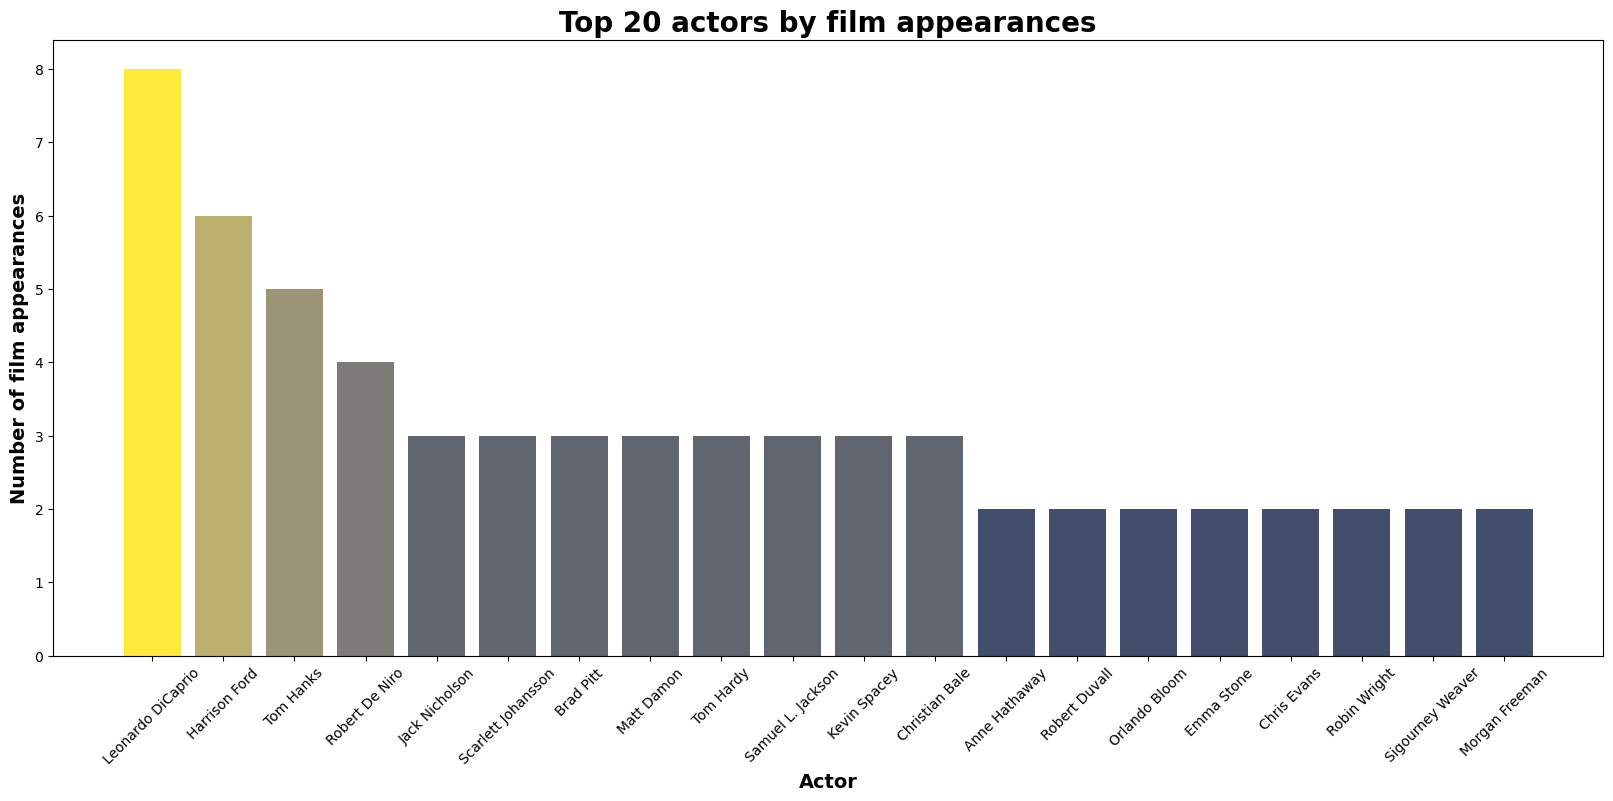

In [25]:
# Filter by top 20 actors
top_20 = top_actors.head(20)

# Create color map for bar chart
normalized_values = np.array(top_20['Count']) / np.max(top_20['Count'])
cmap = plt.cm.cividis
colors = cmap(normalized_values)

# Create bar chart
plt.figure(figsize=(20,8))
actor_graph = plt.bar(top_20.Actors, top_20.Count, color=colors)
plt.title('Top 20 actors by film appearances', fontweight='bold', fontsize=20)

# Update chart labels 
plt.xticks(rotation=45)
plt.xlabel('Actor', fontweight='bold', fontsize=14)
plt.ylabel('Number of film appearances', fontweight='bold', fontsize=14)

# Display chart
plt.show()